## What's your city

In [1]:
# run code colab
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
from fastai.vision import *

## Get data

Go to [Google Images](http://images.google.com) and search for the images you are interested in.

It is a good idea to put things you want to exclude into the search query:

    "san francisco" -munich -seouul

And you can also limit your results to show `only photos` by clicking on Settings and Advanced Search.

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

In [0]:
def download_img(city: str):
    folder = city
    file = f'{city}_urls.csv'
    path = Path('./dataset')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)
    verify_images(path/city, delete=True, max_size=500)

In [4]:
download_img('sanfrancisco')
download_img('munich')
download_img('seoul')

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
classes = ['sanfrancisco','munich','seoul']

## View data

In [0]:
np.random.seed(0)
path = Path('./dataset')
data = ImageDataBunch.from_folder(path, train="./dataset", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [7]:
data.classes

['munich', 'sanfrancisco', 'seoul']

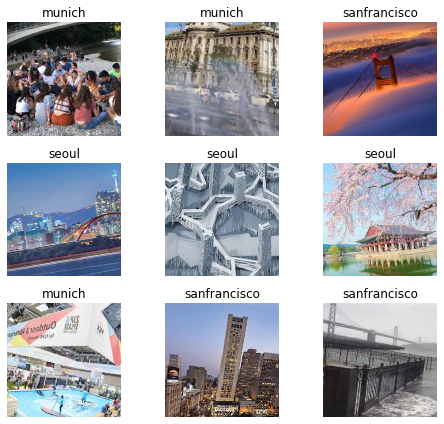

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
data.c, len(data.train_ds), len(data.valid_ds) #class, train, validation

(3, 384, 96)

## Train model

In [10]:
dir(models)

['BasicBlock',
 'Darknet',
 'DynamicUnet',
 'ResLayer',
 'ResNet',
 'SqueezeNet',
 'UnetBlock',
 'WideResNet',
 'XResNet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'alexnet',
 'darknet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'squeezenet1_0',
 'squeezenet1_1',
 'unet',
 'vgg11_bn',
 'vgg13_bn',
 'vgg16_bn',
 'vgg19_bn',
 'wrn',
 'wrn_22',
 'xception',
 'xresnet',
 'xresnet101',
 'xresnet152',
 'xresnet18',
 'xresnet18_deep',
 'xresnet34',
 'xresnet34_deep',
 'xresnet50',
 'xresnet50_deep']

In [11]:
# usisng resnet34 as pre-trained model
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 189MB/s]


#### Fine-tuning (with resnet36):: *41%*

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.940028,1.222663,0.531250,00:05
1,1.547438,1.235766,0.375000,00:05
2,1.331015,1.303223,0.364583,00:05
3,1.140954,1.243324,0.375000,00:05


In [0]:
learn.save('stage-1')

### train the whole model

#### Default learning rate:: 31%

In [0]:
learn.unfreeze() #plz train the whole model

In [15]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.984158,1.448687,0.354167,00:05
1,0.890949,1.145399,0.312500,00:05


In [16]:
help(learn.fit_one_cycle) #0.003

Help on method fit_one_cycle in module fastai.train:

fit_one_cycle(cyc_len:int, max_lr:Union[float, Collection[float], slice]=slice(None, 0.003, None), moms:Tuple[float, float]=(0.95, 0.85), div_factor:float=25.0, pct_start:float=0.3, final_div:float=None, wd:float=None, callbacks:Union[Collection[fastai.callback.Callback], NoneType]=None, tot_epochs:int=None, start_epoch:int=None) -> None method of fastai.basic_train.Learner instance
    Fit a model following the 1cycle policy.



---

#### Suggested learning rate:: 31%

In [0]:
learn.unfreeze()

In [25]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 7.59E-07
Min loss divided by 10: 8.32E-05


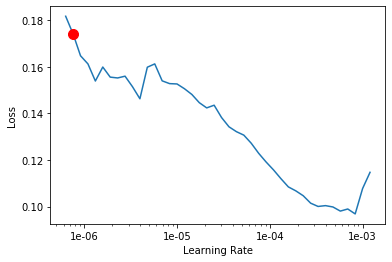

In [26]:
learn.recorder.plot(suggestion=True)

In [27]:
learn.fit_one_cycle(2, max_lr = slice(7.59E-07,8.32E-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.195632,1.841010,0.322917,00:05
1,0.138235,1.755911,0.312500,00:05


In [0]:
learn.save('stage-2')

- So fine-tuning is the most well perfoming model

## Interpretation

In [0]:
learn.load('stage-2');

In [30]:
interp = ClassificationInterpretation.from_learner(learn)

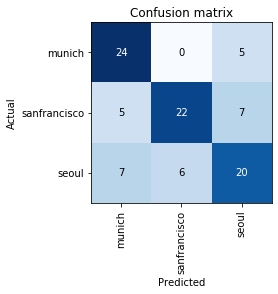

In [31]:
interp.plot_confusion_matrix()

In [32]:
interp.most_confused()

[('sanfrancisco', 'seoul', 7),
 ('seoul', 'munich', 7),
 ('seoul', 'sanfrancisco', 6),
 ('munich', 'seoul', 5),
 ('sanfrancisco', 'munich', 5)]

### Data Cleaning

* ImageCleaner does not work in Colab. Use this method instead
    - https://forums.fast.ai/t/platform-colab/28161/184
    - https://forums.fast.ai/t/pr-new-widget-class-confusion-with-google-colab-support/50829

In [0]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In order to clean the entire set of images, we need to create a new dataset **without the split**. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

In [34]:
ImageList.from_folder(path)

ImageList (480 items)
Image (3, 168, 300),Image (3, 225, 225),Image (3, 194, 259),Image (3, 159, 318),Image (3, 127, 397)
Path: dataset

In [0]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch())

In [0]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)
learn_cln.load('stage-2');

In [39]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

In [40]:
cleaner_tuples = []
for ds_type in [DatasetType.Valid, DatasetType.Train]:
  ds, idxs = DatasetFormatter().from_toplosses(learn, n_imgs=30, ds_type=ds_type)
  cleaner_tuples.append((ds_type, ds, idxs))

import ntpath

top_loss_path = path/'top_losses/'
top_loss_path.mkdir(parents=True, exist_ok=True)
top_loss_filenames = set()

for ct in cleaner_tuples:
  ds_type = ct[0]
  ds = ct[1]
  idxs = ct[2]

  for idx in idxs:
    full_filepath = ds.x.items[idx]
    _, filename = ntpath.split(full_filepath)
    
    image_data = ds[idx][0]
    image_category = ds[idx][1]
    image_fullpath = top_loss_path/f'{image_category}_{filename}'
    image_data.save(image_fullpath)
    top_loss_filenames.add(image_fullpath) 
    
print(f'{len(top_loss_filenames)} top loss images saved to {top_loss_path}')

46 top loss images saved to dataset/top_losses


In [41]:
doc(data.show_batch)